In [57]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("justinas/nba-players-data")

print("Path to dataset files:", path)

Path to dataset files: /home/jlevar/.cache/kagglehub/datasets/justinas/nba-players-data/versions/5


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [59]:
df = pd.read_csv(f"{path}/all_seasons.csv")

df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [60]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [5]:
df.groupby('age').pts.mean()

age
18.0    4.433333
19.0    6.636842
20.0    7.416038
21.0    7.877903
22.0    7.907589
23.0    7.184729
24.0    7.526257
25.0    8.261757
26.0    8.953875
27.0    9.064862
28.0    9.321998
29.0    9.252645
30.0    9.044534
31.0    8.651633
32.0    8.194149
33.0    7.991863
34.0    7.468665
35.0    7.593774
36.0    7.031220
37.0    6.850714
38.0    5.878652
39.0    5.982692
40.0    5.320690
41.0    4.255556
42.0    3.975000
43.0    3.600000
44.0    2.400000
Name: pts, dtype: float64

In [6]:
df['height_int'] = df.player_height.astype('int64')
height_to_points = df.groupby('height_int').pts.mean().sort_values(ascending=False)
height_to_points

height_int
228    11.858824
175    10.692593
190     9.525344
220     9.408511
223     9.233333
182     9.153741
185     9.145367
200     8.762421
203     8.487289
193     8.460587
198     8.419352
195     8.142285
210     7.968541
215     7.938049
165     7.784615
187     7.768662
213     7.644926
205     7.584947
208     7.568780
180     6.741026
177     6.101639
201     5.515385
218     4.831183
160     4.780000
231     4.700000
226     3.314286
196     3.120000
167     3.000000
183     1.900000
Name: pts, dtype: float64

<Axes: >

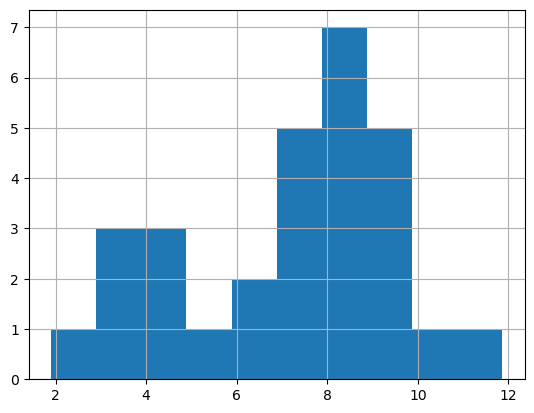

In [7]:
height_to_points.hist(bins=10)

<Axes: xlabel='height_int', ylabel='pts'>

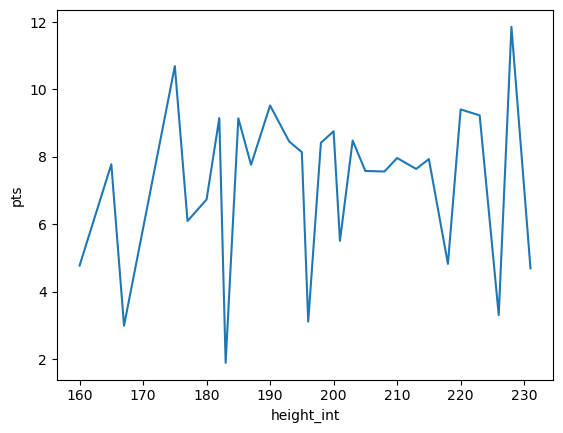

In [8]:
sns.lineplot(data=height_to_points)

<Axes: xlabel='player_height', ylabel='pts'>

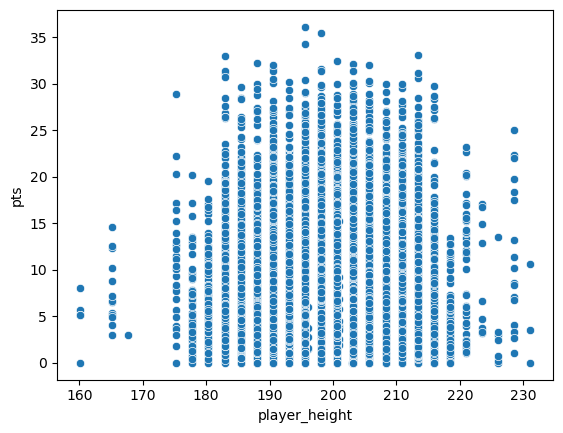

In [9]:
sns.scatterplot(x=df.player_height, y=df.pts)
# df.groupby('draft_year').pts.mean().sort_values(ascending=False)

<Axes: xlabel='player_height', ylabel='pts'>

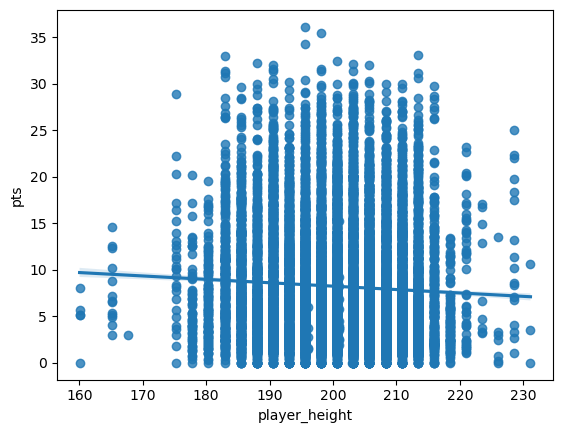

In [10]:
sns.regplot(x=df.player_height, y=df.pts)

<Axes: xlabel='player_height', ylabel='pts'>

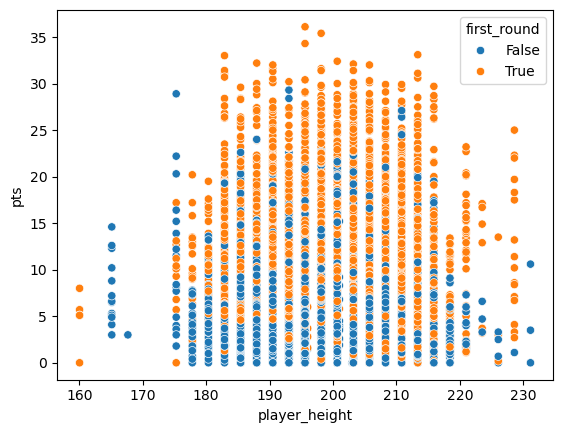

In [11]:
df['first_round'] = df['draft_round'].apply(lambda x: x == "1")
df['first_round'].value_counts()

sns.scatterplot(x=df.player_height, y=df.pts, hue=df.first_round)

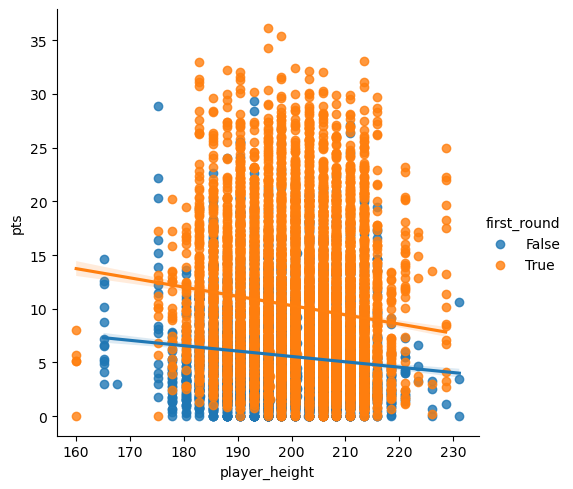

In [12]:
sns.lmplot(x="player_height", y="pts", hue="first_round", data=df)

<Axes: xlabel='height_int'>

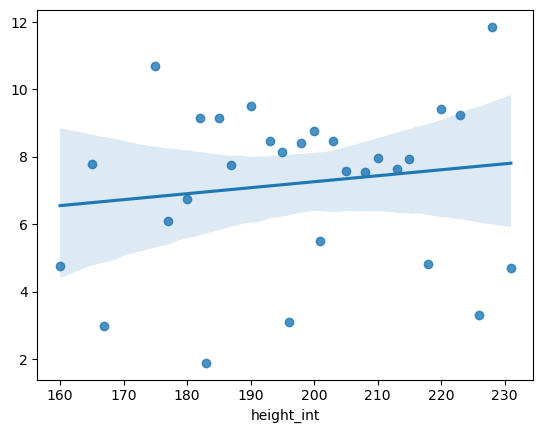

In [13]:
sns.regplot(x=height_to_points.index, y=height_to_points.values)

<Axes: xlabel='season', ylabel='pts'>

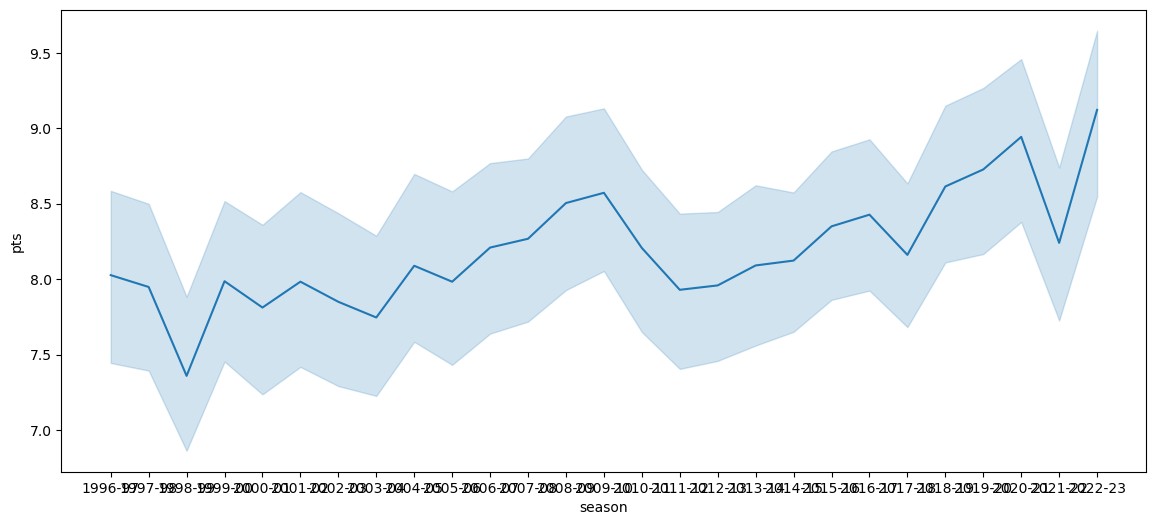

In [14]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="season", y="pts")

In [15]:
df[df["season"] == '1996-97'][["player_height", "pts"]].corr().iloc[0, 1]

-0.04468671625553003

In [16]:
df["season"].unique()

array(['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02',
       '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21', '2021-22', '2022-23'], dtype=object)

In [17]:
pts_to_height = [df[df["season"] == season][["player_height", "pts"]].corr().iloc[0, 1] for season in df["season"].unique()]
corr_per_season = pd.Series(data=pts_to_height, index=df["season"].unique()) 

corr_per_season

1996-97   -0.044687
1997-98    0.032360
1998-99   -0.016130
1999-00   -0.058936
2000-01   -0.055961
2001-02   -0.058301
2002-03   -0.065189
2003-04   -0.064609
2004-05   -0.085790
2005-06   -0.095002
2006-07   -0.073709
2007-08   -0.069670
2008-09   -0.088302
2009-10   -0.071866
2010-11   -0.084616
2011-12   -0.101830
2012-13   -0.087719
2013-14   -0.059641
2014-15   -0.076502
2015-16   -0.081117
2016-17   -0.084180
2017-18   -0.042455
2018-19    0.002233
2019-20   -0.020974
2020-21   -0.025854
2021-22    0.022973
2022-23   -0.007593
dtype: float64

<Axes: title={'center': 'Correlation of Points to Height per Season'}, xlabel='Season Year', ylabel='Correlation of Points to Height'>

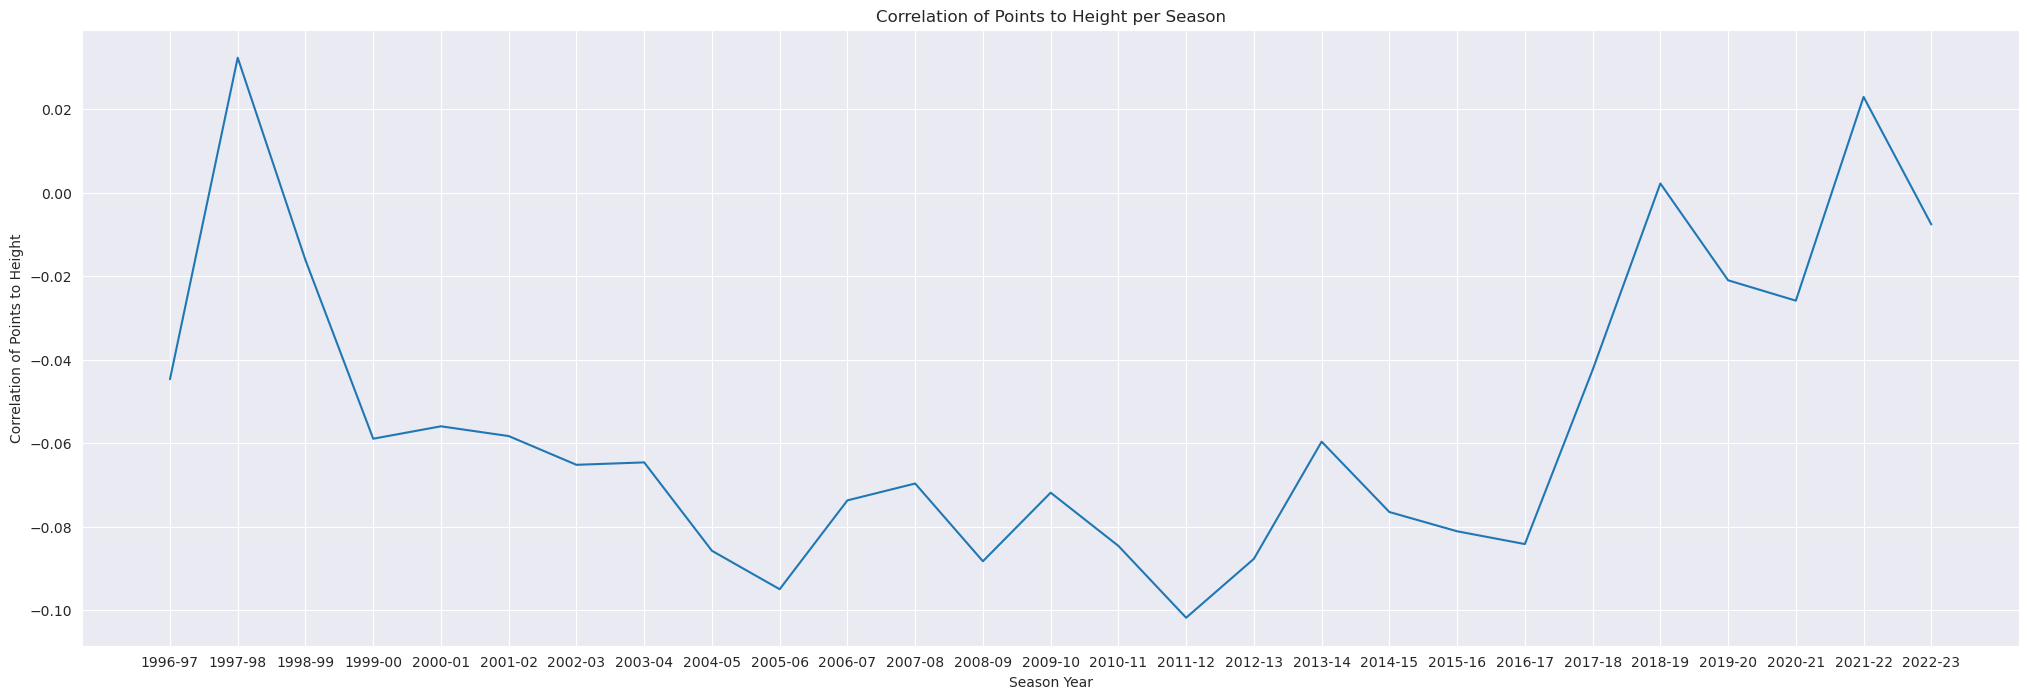

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(25, 8))
plt.title("Correlation of Points to Height per Season")
plt.xlabel("Season Year")
plt.ylabel("Correlation of Points to Height")
sns.lineplot(corr_per_season)

In [68]:
depenedent_vars = ["pts", "ast", "reb"]
independent_vars = ["player_height", "age"]
correlation_data = {}
seasons = df["season"].unique()

for ivar in independent_vars:
    for dvar in depenedent_vars:
        correlation_data[f"{dvar}/{ivar}"] = pd.Series (
            data=[df[df["season"] == season][[ivar, dvar]].corr().iloc[0, 1] for season in seasons],
            index=seasons
            )
        
correlation_data = pd.DataFrame(data=correlation_data)

In [69]:
correlation_data

,pts/player_height,ast/player_height,reb/player_height,pts/age,ast/age,reb/age
1996-97,-0.044687,-0.497682,0.410875,0.026825,0.036077,0.072309
1997-98,0.032360,-0.478937,0.452071,-0.022532,0.037183,0.043466
1998-99,-0.016130,-0.485535,0.391157,0.005144,0.084260,0.069499
1999-00,-0.058936,-0.518696,0.399852,-0.037306,0.045950,0.057441
2000-01,-0.055961,-0.499102,0.395352,-0.074204,0.047683,-0.011238
2001-02,-0.058301,-0.494190,0.408796,-0.009449,0.129685,0.028599
2002-03,-0.065189,-0.472705,0.391280,-0.011527,0.132102,0.013486
2003-04,-0.064609,-0.461006,0.400149,-0.045188,0.077408,-0.025335
2004-05,-0.085790,-0.516461,0.373896,-0.054096,0.059629,-0.033396
2005-06,-0.095002,-0.471123,0.415285,-0.003376,0.071962,0.014117


/tmp/ipykernel_3002/1073525650.py:6: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=correlation_data, palette=["blue", "red", "green"])


<Axes: title={'center': 'Correlation of Stats to Characterisitcs per NBA Season'}, xlabel='Season Year', ylabel='Correlation'>

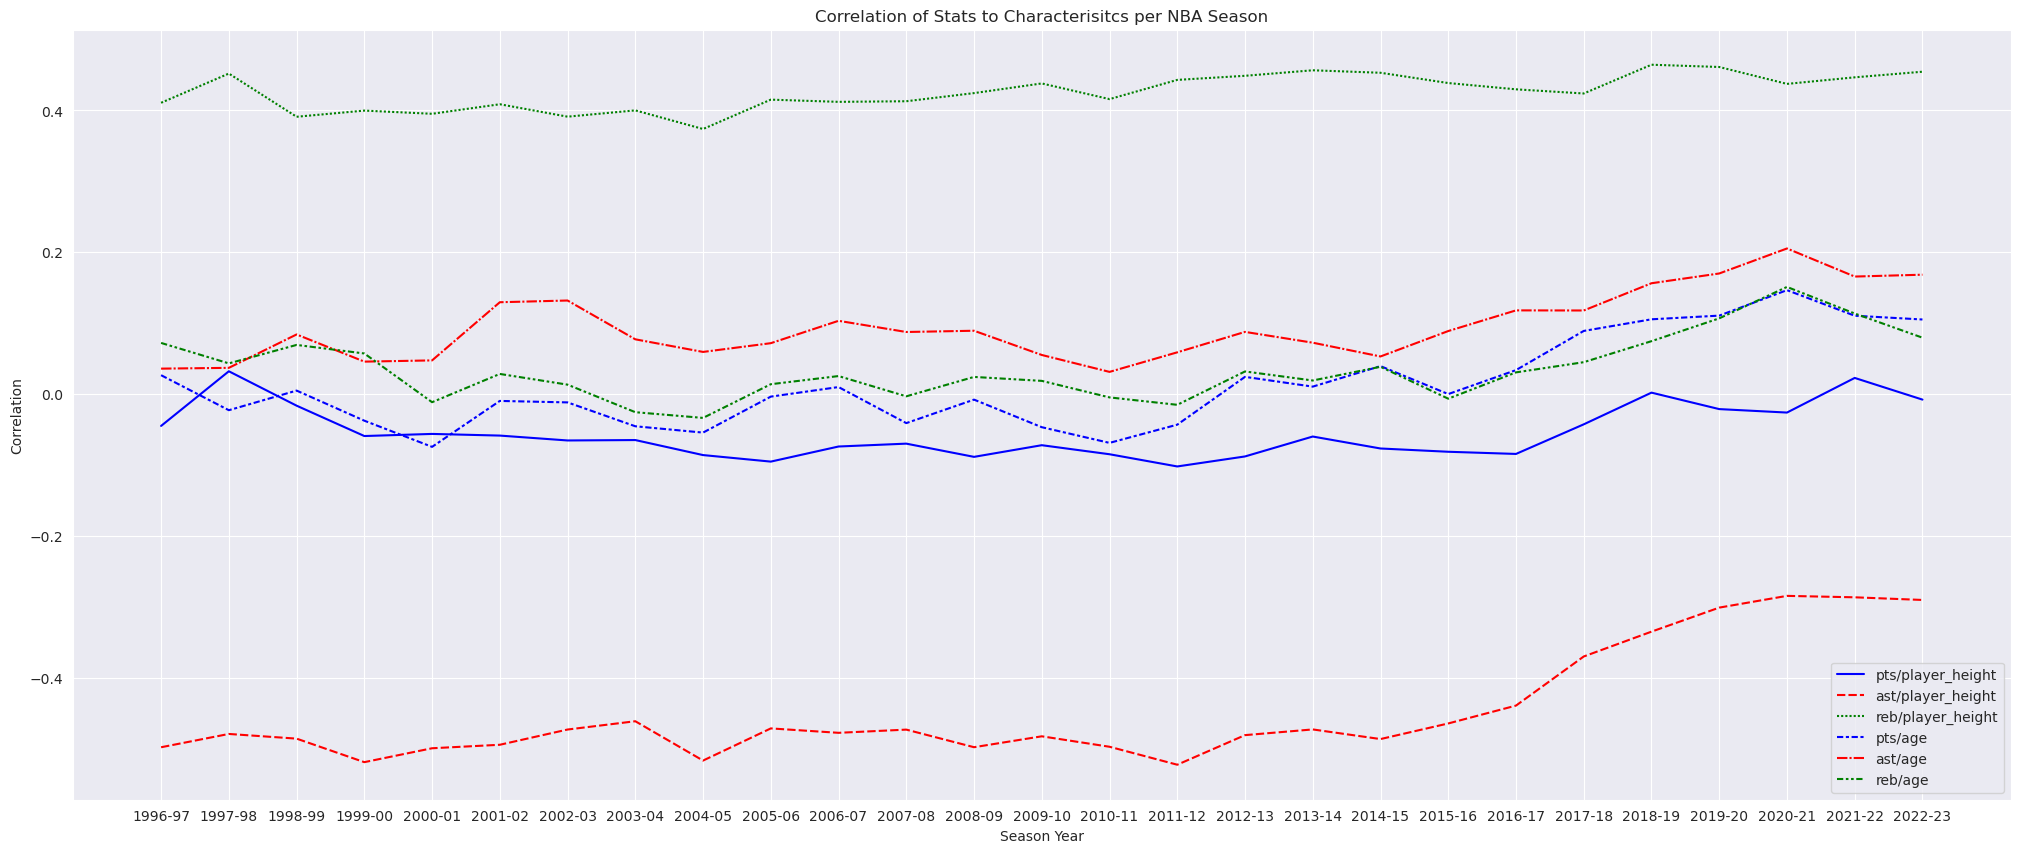

In [71]:
sns.set_style("darkgrid")
plt.figure(figsize=(25, 10))
plt.title("Correlation of Stats to Characterisitcs per NBA Season")
plt.xlabel("Season Year")
plt.ylabel("Correlation")
sns.lineplot(data=correlation_data, palette=["blue", "red", "green"])